# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

sys.path.append('../../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure

In [2]:
# Example file location
filename_example = 'data_pendulum_example/timer_output.dat'

## Data reader

In [3]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

In [4]:
data_example = read_data(filename_example)
n, t = data_example['n'][2:], data_example['t_s'][2:]

#fit function
def lin_funk(x,T,b):
    return T*x+b

#fit data with Minuit
chi2 = Chi2Regression(lin_funk, n, t)

minuit = Minuit(chi2, T=3, b=0)
minuit.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1594                     │              Nfcn = 34               │
│ EDM = 7.25e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ T    │   2.734   │   0.006   │            │            │         │         │       │
│ 1 │ b    │   -4.36   │   0.26    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        T        b │
├───┼───────────────────┤
│ T │ 3.99e-05 -0.00144 │
│ b │ -0.00144   0.0666 │
└───┴───────────────────┘

In [5]:
T_fit , b_fit = minuit.values

2.7335449078139993


Text(0, 0.5, 'Residuals')

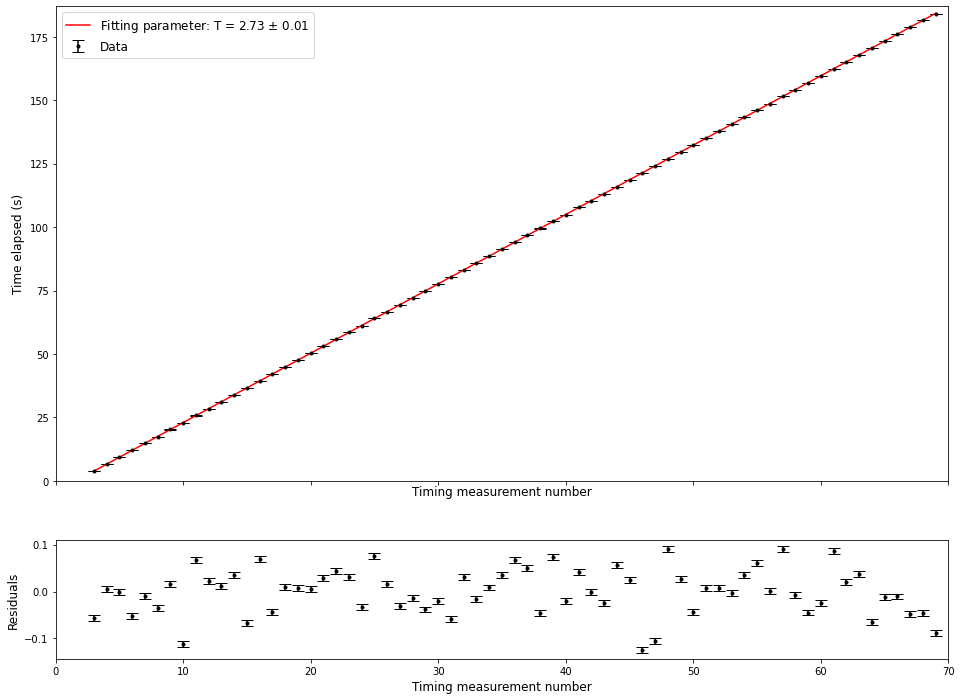

In [34]:
print(T_fit)
# Plotting
sig_t = minuit.errors[0]     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='.', label='Data', capsize=6)
ax[0].plot(n, lin_funk(n, T_fit, b_fit), color='r', label=f'Fitting parameter: T = {T_fit:.2f} $\pm$ {sig_t:.2f}')
ax[0].set_xlabel('Timing measurement number', fontsize=12)
ax[0].set_ylabel('Time elapsed (s)', fontsize=12)
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))
ax[0].legend(fontsize=12)

residuals = t-lin_funk(n, T_fit, b_fit)
ax[1].errorbar(n, residuals, yerr=sig_t, color='k', fmt='.', capsize=6)
ax[1].set_xlabel('Timing measurement number', fontsize=12) 
ax[1].set_ylabel('Residuals', fontsize=12)

(array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 3., 7., 4., 5., 8., 9., 5.,
        8., 3., 3., 4., 3., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.2       , -0.18666667, -0.17333333, -0.16      , -0.14666667,
        -0.13333333, -0.12      , -0.10666667, -0.09333333, -0.08      ,
        -0.06666667, -0.05333333, -0.04      , -0.02666667, -0.01333333,
         0.        ,  0.01333333,  0.02666667,  0.04      ,  0.05333333,
         0.06666667,  0.08      ,  0.09333333,  0.10666667,  0.12      ,
         0.13333333,  0.14666667,  0.16      ,  0.17333333,  0.18666667,
         0.2       ]),
 [<matplotlib.patches.Polygon at 0x23f8b85c040>])

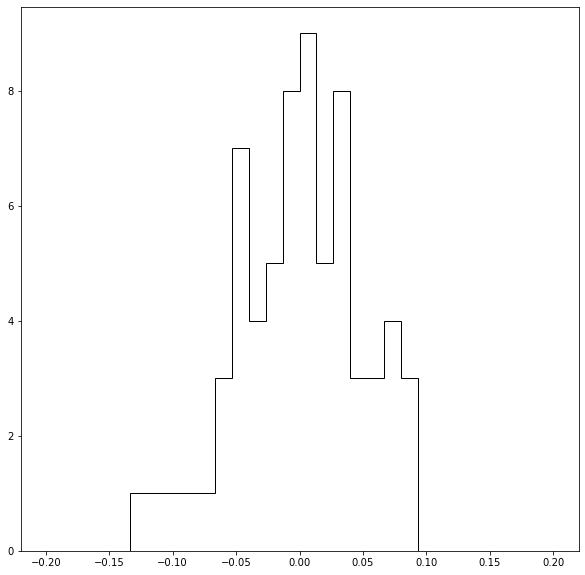

In [48]:
Nbins = 30
xmin, xmax = -0.2, 0.2
bwidth = (xmax-xmin)/Nbins



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.hist(residuals, bins=Nbins, range=(xmin,xmax), color='k', histtype='step', label='Residuals')


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.